
#  Optimizing Delivery Partner Allocation in Last Mile Logistics
## Data Preprocessing 



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged_delivery_data.csv')
df.head(10)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001
5,659996,10,Chongqing,3605,108.71644,30.90470,50,14,08-08 19:01:00,08-08 19:01:00,108.71796,30.95630,08-11 10:50:00,08-11 10:50:00,108.71632,30.90479,808
6,4481765,10,Chongqing,3605,108.71605,30.90410,50,14,09-30 10:00:00,09-30 10:00:00,108.71824,30.95583,09-30 16:38:00,09-30 16:38:00,108.71429,30.90416,930
7,2365752,10,Chongqing,3605,108.71633,30.90266,50,14,09-30 10:00:00,09-30 10:00:00,108.71826,30.95585,09-30 18:38:00,09-30 18:38:00,108.71425,30.90416,930
8,20671,10,Chongqing,3605,108.71643,30.90253,50,14,05-20 10:06:00,05-20 10:06:00,108.71795,30.95621,05-21 15:30:00,05-21 15:30:00,108.71643,30.90250,520
9,965648,10,Chongqing,3605,108.71554,30.90256,50,14,08-10 10:52:00,08-10 10:52:00,108.71797,30.95630,08-12 15:50:00,08-12 15:50:00,108.71542,30.90243,810


#### Understanding the dataset - Statistical overview

In [3]:
df.shape

(4514661, 17)

In [4]:
df['city'].unique()

array(['Chongqing', 'Jilin', 'Hangzhou', 'Shanghai', 'Yantai'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514661 entries, 0 to 4514660
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   region_id          int64  
 2   city               object 
 3   courier_id         int64  
 4   lng                float64
 5   lat                float64
 6   aoi_id             int64  
 7   aoi_type           int64  
 8   accept_time        object 
 9   accept_gps_time    object 
 10  accept_gps_lng     float64
 11  accept_gps_lat     float64
 12  delivery_time      object 
 13  delivery_gps_time  object 
 14  delivery_gps_lng   float64
 15  delivery_gps_lat   float64
 16  ds                 int64  
dtypes: float64(6), int64(6), object(5)
memory usage: 585.6+ MB


In [6]:
df[['accept_time', 'delivery_time']].sample(5)

,accept_time,delivery_time
774624,10-02 15:23:00,10-02 20:48:00
3998062,09-19 09:28:00,09-19 10:09:00
3747894,09-22 08:25:00,09-22 09:27:00
1513033,08-04 08:37:00,08-04 16:05:00
1305919,08-18 13:20:00,08-18 14:46:00


In [7]:
df.describe()

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat,ds
count,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.511284e+06,4.511284e+06,4.514661e+06,4.514661e+06,4.514661e+06
mean,2.257330e+06,7.381683e+01,2.385268e+03,1.178683e+02,3.084852e+01,2.998049e+04,4.355784e+00,1.178629e+02,3.083946e+01,1.178634e+02,3.084735e+01,8.112479e+02
std,1.303271e+06,4.538614e+01,1.390526e+03,5.822634e+00,1.928226e+00,1.729042e+04,5.527705e+00,5.853219e+00,1.916018e+00,5.867664e+00,1.937424e+00,1.653643e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.020849e+02,2.311348e+01,0.000000e+00,0.000000e+00,-9.000000e-05,-9.000000e-05,-9.000000e-05,-9.000000e-05,5.010000e+02
25%,1.128665e+06,3.600000e+01,1.206000e+03,1.199666e+02,3.012185e+01,1.487400e+04,1.000000e+00,1.199621e+02,3.010518e+01,1.199666e+02,3.012170e+01,7.030000e+02
50%,2.257330e+06,7.100000e+01,2.345000e+03,1.202321e+02,3.030657e+01,3.005500e+04,1.000000e+00,1.202476e+02,3.031297e+01,1.202317e+02,3.030687e+01,8.200000e+02
75%,3.385995e+06,1.110000e+02,3.588000e+03,1.214099e+02,3.118919e+01,4.446400e+04,8.000000e+00,1.214002e+02,3.118778e+01,1.214098e+02,3.118906e+01,9.290000e+02
max,4.514660e+06,1.670000e+02,4.876000e+03,1.268191e+02,4.422335e+01,6.014900e+04,1.500000e+01,1.266288e+02,4.394521e+01,1.397561e+02,4.576194e+01,1.031000e+03


In [8]:
#checking counts
df.count().to_frame(name='Count_Rows')

,Count_Rows
order_id,4514661
region_id,4514661
city,4514661
courier_id,4514661
lng,4514661
lat,4514661
aoi_id,4514661
aoi_type,4514661
accept_time,4514661
accept_gps_time,4514661


---

## Data Cleaning
##### Handling Missing Values
##### Checkig Duplicates
##### Verifing Data Types

In [9]:
#checking missing values
df.isnull().sum()

order_id                0
region_id               0
city                    0
courier_id              0
lng                     0
lat                     0
aoi_id                  0
aoi_type                0
accept_time             0
accept_gps_time         0
accept_gps_lng       3377
accept_gps_lat       3377
delivery_time           0
delivery_gps_time       0
delivery_gps_lng        0
delivery_gps_lat        0
ds                      0
dtype: int64

In [10]:
# Checking for Missing Values in Essential Columns from gitbook
df[['accept_time', 'delivery_time', 'lng', 'lat', 'courier_id']].isnull().sum().to_frame(name='Essential Missing Values')

,Essential Missing Values
accept_time,0
delivery_time,0
lng,0
lat,0
courier_id,0


In [11]:
# Impute missing 'accept_gps_lng' and 'accept_gps_lat' values with the mean of their corresponding city groups
df['accept_gps_lng'] = df.groupby('city')['accept_gps_lng'].transform(lambda x: x.fillna(x.mean()))
df['accept_gps_lat'] = df.groupby('city')['accept_gps_lat'].transform(lambda x: x.fillna(x.mean()))

In [12]:
#verifying missing
df.isnull().sum()


order_id             0
region_id            0
city                 0
courier_id           0
lng                  0
lat                  0
aoi_id               0
aoi_type             0
accept_time          0
accept_gps_time      0
accept_gps_lng       0
accept_gps_lat       0
delivery_time        0
delivery_gps_time    0
delivery_gps_lng     0
delivery_gps_lat     0
ds                   0
dtype: int64

In [13]:
#checking dup
df[df.duplicated()]

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds


In [14]:
df.dtypes

order_id               int64
region_id              int64
city                  object
courier_id             int64
lng                  float64
lat                  float64
aoi_id                 int64
aoi_type               int64
accept_time           object
accept_gps_time       object
accept_gps_lng       float64
accept_gps_lat       float64
delivery_time         object
delivery_gps_time     object
delivery_gps_lng     float64
delivery_gps_lat     float64
ds                     int64
dtype: object

In [15]:
# converting dtypes
df['accept_time'] = pd.to_datetime('2024-' + df['accept_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['accept_gps_time'] = pd.to_datetime('2024-' + df['accept_gps_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['delivery_time'] = pd.to_datetime('2024-' + df['delivery_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['delivery_gps_time'] = pd.to_datetime('2024-' + df['delivery_gps_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')

df['aoi_type'] = df['aoi_type'].astype('category')

In [16]:
df.dtypes

order_id                      int64
region_id                     int64
city                         object
courier_id                    int64
lng                         float64
lat                         float64
aoi_id                        int64
aoi_type                   category
accept_time          datetime64[ns]
accept_gps_time      datetime64[ns]
accept_gps_lng              float64
accept_gps_lat              float64
delivery_time        datetime64[ns]
delivery_gps_time    datetime64[ns]
delivery_gps_lng            float64
delivery_gps_lat            float64
ds                            int64
dtype: object

In [17]:
df.sample(5)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
2051340,3909235,82,Hangzhou,2907,120.15159,30.26953,14036,1,2024-10-17 16:40:00,2024-10-17 16:40:00,120.12380,30.27043,2024-10-17 19:07:00,2024-10-17 19:07:00,120.15159,30.26965,1017
3399451,4178836,38,Shanghai,490,121.91886,30.91867,57398,1,2024-07-14 16:34:00,2024-07-14 16:34:00,121.86462,30.93043,2024-07-14 17:19:00,2024-07-14 17:19:00,121.91846,30.91901,714
772530,2451279,155,Chongqing,2872,106.56203,29.58026,31306,1,2024-07-27 14:40:00,2024-07-27 14:40:00,106.55277,29.57862,2024-07-27 21:51:00,2024-07-27 21:51:00,106.34121,30.09169,727
4309530,707904,86,Yantai,1508,121.51041,37.43543,4321,14,2024-08-04 08:50:00,2024-08-04 08:50:00,121.39177,37.41006,2024-08-04 15:51:00,2024-08-04 15:51:00,121.40450,37.41826,804
3445336,4181190,42,Shanghai,1953,121.53808,31.18849,16302,1,2024-08-27 08:12:00,2024-08-27 08:12:00,121.53068,31.18771,2024-08-27 09:30:00,2024-08-27 09:30:00,121.53650,31.19022,827


---

### Adding & Validating NEW columns: `delivery_duration` And `distance` columns

In [18]:
#adding duration column
df['delivery_duration'] = df['delivery_time'] - df['accept_time']

In [19]:
df['delivery_duration'].describe()

count                      4514661
mean     0 days 03:05:49.485815214
std      0 days 13:00:37.288630943
min            -294 days +08:23:00
25%                0 days 00:56:00
50%                0 days 01:45:00
75%                0 days 03:13:00
max              115 days 14:59:00
Name: delivery_duration, dtype: object

<span style="color:red"> ***The minimum `delivery_duration` time shows a negiative number....***</span>


In [20]:
#identifing rows with negative durations
negative_durations = df[df['delivery_duration'] < pd.Timedelta(0)]
negative_durations

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration
440298,3739029,131,Chongqing,2954,106.19835,29.49296,28470,14,2024-10-31 10:57:00,2024-10-31 10:57:00,106.21016,29.55476,2024-01-11 19:20:00,2024-01-11 19:20:00,106.19901,29.49442,1031,-294 days +08:23:00
518410,3212380,135,Chongqing,486,107.80753,30.66992,55255,14,2024-10-31 12:14:00,2024-10-31 12:14:00,107.74910,30.66363,2024-01-13 14:16:00,2024-01-13 14:16:00,107.75239,30.67711,1031,-292 days +02:02:00
522559,3956975,136,Chongqing,3893,106.31756,29.52306,57605,14,2024-10-22 17:54:00,2024-10-22 17:54:00,106.36630,29.48668,2024-01-19 12:56:00,2024-01-19 12:56:00,106.31752,29.52306,1022,-278 days +19:02:00


In [21]:
#removing rows with negative durations
df = df[df['delivery_duration'] >= pd.Timedelta(0)]

# Verifing again
df['delivery_duration'].describe()

count                      4514658
mean     0 days 03:06:06.004680753
std      0 days 11:43:43.454804323
min                0 days 00:00:00
25%                0 days 00:56:00
50%                0 days 01:45:00
75%                0 days 03:13:00
max              115 days 14:59:00
Name: delivery_duration, dtype: object

In [22]:
#doing the same thing with \\ delivery_gps_time and accept_gps_time
#adding duration_GPS_time column
df['duration_gps_time'] = df['delivery_gps_time'] - df['accept_gps_time']

negative_durations = df[df['duration_gps_time'] < pd.Timedelta(0)]
negative_durations

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration,duration_gps_time


In [23]:
df = df.drop('duration_gps_time', axis=1)
df.sample(5)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration
1197408,73743,19,Hangzhou,1926,120.15066,30.32582,50526,1,2024-08-03 18:05:00,2024-08-03 18:05:00,120.13949,30.32906,2024-08-03 18:59:00,2024-08-03 18:59:00,120.15067,30.32587,803,0 days 00:54:00
1219345,179058,23,Hangzhou,1901,120.17046,30.31060,27357,14,2024-09-05 16:07:00,2024-09-05 16:07:00,120.18485,30.33910,2024-09-05 18:44:00,2024-09-05 18:44:00,120.16575,30.31157,905,0 days 02:37:00
1117424,577694,12,Hangzhou,1322,120.45983,30.23106,32252,14,2024-09-01 17:38:00,2024-09-01 17:38:00,120.49155,30.26323,2024-09-01 19:12:00,2024-09-01 19:12:00,120.46125,30.23194,901,0 days 01:34:00
1166449,3480960,19,Hangzhou,4806,120.12963,30.32821,20873,1,2024-07-11 17:14:00,2024-07-11 17:14:00,120.13940,30.32907,2024-07-11 18:04:00,2024-07-11 18:04:00,120.12961,30.32832,711,0 days 00:50:00
2762855,4066122,122,Hangzhou,4198,120.24667,30.30844,53895,1,2024-06-25 17:53:00,2024-06-25 17:53:00,120.24948,30.32836,2024-06-25 18:30:00,2024-06-25 18:30:00,120.24672,30.30843,625,0 days 00:37:00


In [24]:
#adding distance column between acceptance and pickup
df['distance'] = np.sqrt((df['delivery_gps_lng'] - df['accept_gps_lng'])**2 +
                         (df['delivery_gps_lat'] - df['accept_gps_lat'])**2)

# Display the DataFrame to verify the new 'distance' column
df.sample(5)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration,distance
2618665,3494761,119,Hangzhou,3338,119.70539,29.80312,12475,1,2024-05-15 09:14:00,2024-05-15 09:14:00,119.72490,29.82105,2024-05-15 09:44:00,2024-05-15 09:44:00,119.70532,29.80321,515,0 days 00:30:00,0.026489
2614787,1637220,119,Hangzhou,3338,119.74400,29.83050,2611,4,2024-09-29 08:53:00,2024-09-29 08:53:00,119.72486,29.82095,2024-09-29 17:53:00,2024-09-29 17:53:00,119.74399,29.83051,929,0 days 09:00:00,0.021386
3981382,3771057,71,Shanghai,2096,121.66996,31.27195,46955,14,2024-08-09 16:48:00,2024-08-09 16:48:00,121.67375,31.26379,2024-08-09 19:23:00,2024-08-09 19:23:00,121.66993,31.27202,809,0 days 02:35:00,0.009073
1171472,657773,19,Hangzhou,4165,120.13012,30.31334,28741,1,2024-05-11 08:29:00,2024-05-11 08:29:00,120.13937,30.32903,2024-05-11 11:52:00,2024-05-11 11:52:00,120.13002,30.31347,511,0 days 03:23:00,0.018153
2428621,2429739,101,Hangzhou,558,120.35420,30.32061,39347,4,2024-10-18 15:30:00,2024-10-18 15:30:00,120.34863,30.32770,2024-10-18 17:06:00,2024-10-18 17:06:00,120.35420,30.32073,1018,0 days 01:36:00,0.008922


In [25]:
df['distance']

0          0.055776
1          0.053710
2          0.053861
3          0.052578
4          0.052169
             ...   
4514656    0.019673
4514657    0.019668
4514658    0.022433
4514659    0.019559
4514660    0.009510
Name: distance, Length: 4514658, dtype: float64

In [26]:
df['distance'].describe()

count    4.514658e+06
mean     3.584109e-02
std      9.933152e-01
min      0.000000e+00
25%      1.107610e-02
50%      1.878826e-02
75%      3.136084e-02
max      1.339792e+02
Name: distance, dtype: float64

---

## Outlier Detection

- #### Delivery Duration : Identifing abnormally long or short delivery durations.

In [27]:
# Calculating Q1 and Q3
Q1 = df['delivery_duration'].quantile(0.25)
Q3 = df['delivery_duration'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


lower_bound, upper_bound

(Timedelta('-1 days +21:30:30'), Timedelta('0 days 06:38:30'))

In [28]:
# Filtering out outliers
# df = df[(df['task_duration'] >= lower_bound) & (df['task_duration'] <= upper_bound)]
df = df[df['delivery_duration'].between(lower_bound, upper_bound)]
df.sample(5)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration,distance
1662232,2800108,55,Hangzhou,608,119.29331,29.48722,48446,1,2024-09-02 09:53:00,2024-09-02 09:53:00,119.27701,29.43725,2024-09-02 11:54:00,2024-09-02 11:54:00,119.29284,29.48766,902,0 days 02:01:00,0.052837
3725799,616425,54,Shanghai,1242,121.21149,31.12477,52779,14,2024-08-22 18:30:00,2024-08-22 18:30:00,121.19728,31.12634,2024-08-22 20:51:00,2024-08-22 20:51:00,121.21143,31.12470,822,0 days 02:21:00,0.014245
4382123,2065661,111,Yantai,1808,121.23787,37.54504,50918,14,2024-10-31 10:46:00,2024-10-31 10:46:00,121.28278,37.55129,2024-10-31 15:17:00,2024-10-31 15:17:00,121.23765,37.54821,1031,0 days 04:31:00,0.045235
1638248,4276848,49,Hangzhou,2597,120.15774,30.14201,58038,1,2024-08-03 09:28:00,2024-08-03 09:28:00,120.16988,30.13078,2024-08-03 10:59:00,2024-08-03 10:59:00,120.15977,30.14206,803,0 days 01:31:00,0.015148
311288,2853651,110,Chongqing,2014,106.49721,29.56321,28766,1,2024-10-09 08:38:00,2024-10-09 08:38:00,106.49787,29.57356,2024-10-09 10:25:00,2024-10-09 10:25:00,106.49845,29.56405,1009,0 days 01:47:00,0.009528


- #### Geospatial Anomalies: Validating `lng/lat` values for any out-of-bound entries:
     > Latitude range: -90 to 90.
     
     > Longitude range: -180 to 180


In [29]:
# Validating lat and lng values
df = df[(df['lat'] >= -90) & (df['lat'] <= 90) & (df['lng'] >= -180) & (df['lng'] <= 180)]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4193458 entries, 0 to 4514660
Data columns (total 19 columns):
 #   Column             Dtype          
---  ------             -----          
 0   order_id           int64          
 1   region_id          int64          
 2   city               object         
 3   courier_id         int64          
 4   lng                float64        
 5   lat                float64        
 6   aoi_id             int64          
 7   aoi_type           category       
 8   accept_time        datetime64[ns] 
 9   accept_gps_time    datetime64[ns] 
 10  accept_gps_lng     float64        
 11  accept_gps_lat     float64        
 12  delivery_time      datetime64[ns] 
 13  delivery_gps_time  datetime64[ns] 
 14  delivery_gps_lng   float64        
 15  delivery_gps_lat   float64        
 16  ds                 int64          
 17  delivery_duration  timedelta64[ns]
 18  distance           float64        
dtypes: category(1), datetime64[ns](4), float64(7), 

---

## Data Transformation : 
> Normalize numerical  features like `distance` and `delivery_duration` to ensure all variables are on a similar scale.

> Encoding Categorical Variables  ->  `city` and `aoi_type` to numeric using one-hot or label encoding.

In [31]:
df['delivery_duration'] = (df['delivery_time'] - df['accept_time']).dt.total_seconds()

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_columns = ['distance', 'delivery_duration']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [33]:
df['delivery_duration']

0          1.000000
6          1.000000
20         0.731156
21         0.263819
22         0.256281
             ...   
4514655    0.585427
4514656    0.349246
4514657    0.768844
4514658    0.133166
4514660    0.766332
Name: delivery_duration, Length: 4193458, dtype: float64

In [34]:
df['distance']

0          0.000416
6          0.000387
20         0.000103
21         0.000105
22         0.000110
             ...   
4514655    0.000250
4514656    0.000147
4514657    0.000147
4514658    0.000167
4514660    0.000071
Name: distance, Length: 4193458, dtype: float64

In [35]:
#encoding 'city' and 'aoi_type' columns
df = pd.get_dummies(df, columns=['city', 'aoi_type'], drop_first=True)

In [40]:
df.dtypes

order_id                      int64
region_id                     int64
courier_id                    int64
lng                         float64
lat                         float64
aoi_id                        int64
accept_time          datetime64[ns]
accept_gps_time      datetime64[ns]
accept_gps_lng              float64
accept_gps_lat              float64
delivery_time        datetime64[ns]
delivery_gps_time    datetime64[ns]
delivery_gps_lng            float64
delivery_gps_lat            float64
ds                            int64
delivery_duration           float64
distance                    float64
city_Hangzhou                  bool
city_Jilin                     bool
city_Shanghai                  bool
city_Yantai                    bool
aoi_type_1                     bool
aoi_type_2                     bool
aoi_type_3                     bool
aoi_type_4                     bool
aoi_type_5                     bool
aoi_type_6                     bool
aoi_type_7                  

---

## Overview & Saving Cleaned Data

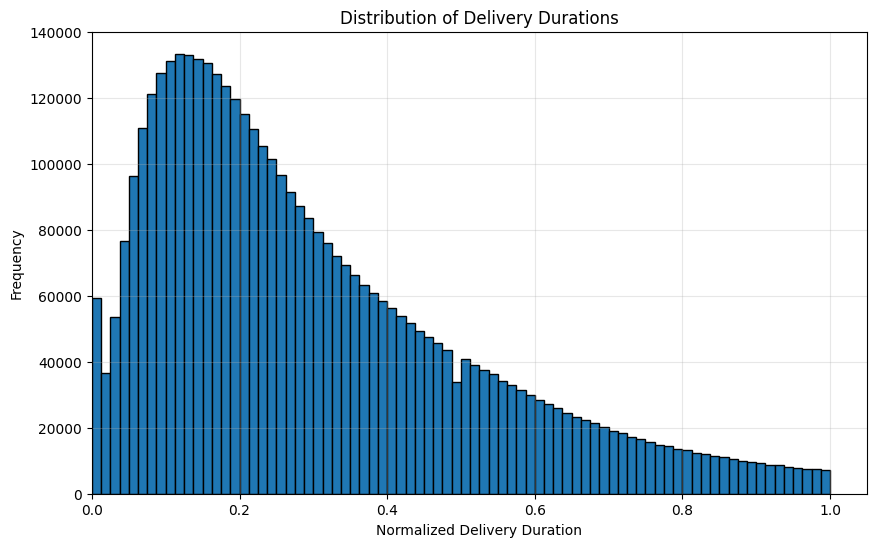

In [41]:
# Histogram of delivery durations
plt.figure(figsize=(10, 6))
plt.hist(df['delivery_duration'], bins=80, edgecolor='black')
plt.title('Distribution of Delivery Durations')
plt.xlabel('Normalized Delivery Duration')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.xlim(left=0)


plt.show()

In [42]:
df.columns

Index(['order_id', 'region_id', 'courier_id', 'lng', 'lat', 'aoi_id',
       'accept_time', 'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat',
       'delivery_time', 'delivery_gps_time', 'delivery_gps_lng',
       'delivery_gps_lat', 'ds', 'delivery_duration', 'distance',
       'city_Hangzhou', 'city_Jilin', 'city_Shanghai', 'city_Yantai',
       'aoi_type_1', 'aoi_type_2', 'aoi_type_3', 'aoi_type_4', 'aoi_type_5',
       'aoi_type_6', 'aoi_type_7', 'aoi_type_8', 'aoi_type_9', 'aoi_type_10',
       'aoi_type_11', 'aoi_type_12', 'aoi_type_13', 'aoi_type_14',
       'aoi_type_15'],
      dtype='object')

In [43]:
df.shape

(4193458, 36)

In [44]:
df.iloc[:5, :17]

,order_id,region_id,courier_id,lng,lat,aoi_id,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration,distance
0,2031782,10,73,108.71571,30.90228,50,2024-10-22 10:26:00,2024-10-22 10:26:00,108.71826,30.95587,2024-10-22 17:04:00,2024-10-22 17:04:00,108.66361,30.96702,1022,1.000000,0.000416
6,4481765,10,3605,108.71605,30.90410,50,2024-09-30 10:00:00,2024-09-30 10:00:00,108.71824,30.95583,2024-09-30 16:38:00,2024-09-30 16:38:00,108.71429,30.90416,930,1.000000,0.000387
20,3098203,10,1635,108.71797,30.94364,296,2024-07-10 08:33:00,2024-07-10 08:33:00,108.71801,30.95637,2024-07-10 13:24:00,2024-07-10 13:24:00,108.71809,30.94260,710,0.731156,0.000103
21,356619,10,1635,108.71979,30.94130,296,2024-09-09 09:04:00,2024-09-09 09:04:00,108.71803,30.95629,2024-09-09 10:49:00,2024-09-09 10:49:00,108.71970,30.94235,909,0.263819,0.000105
22,1484207,10,1635,108.72106,30.94164,296,2024-10-19 08:29:00,2024-10-19 08:29:00,108.71820,30.95598,2024-10-19 10:11:00,2024-10-19 10:11:00,108.72307,30.94201,1019,0.256281,0.000110


In [ ]:
df.iloc[:5,17:]

,city_Hangzhou,city_Jilin,city_Shanghai,city_Yantai,aoi_type_1,aoi_type_2,aoi_type_3,aoi_type_4,aoi_type_5,aoi_type_6,aoi_type_7,aoi_type_8,aoi_type_9,aoi_type_10,aoi_type_11,aoi_type_12,aoi_type_13,aoi_type_14,aoi_type_15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [95]:
df.to_csv('cleaned_delivery_data.csv', index=False)